# Apache Logs 

### Grab Logs

In [11]:
# Grab Public Apache access log
! wget http://www.almhuette-raith.at/apache-log/access.log

--2021-11-12 10:30:58--  http://www.almhuette-raith.at/apache-log/access.log
Resolving www.almhuette-raith.at (www.almhuette-raith.at)... 91.143.107.26
Connecting to www.almhuette-raith.at (www.almhuette-raith.at)|91.143.107.26|:80... connected.
HTTP request sent, awaiting response... 
  HTTP/1.1 200 OK
  Date: Fri, 12 Nov 2021 10:30:58 GMT
  Server: Apache/1.3.34 (Debian) mod_perl/1.29
  Last-Modified: Fri, 12 Nov 2021 10:25:33 GMT
  ETag: "32a07ca-77b789c-618e411d"
  Accept-Ranges: bytes
  Content-Length: 125532316
  Keep-Alive: timeout=2, max=100
  Connection: Keep-Alive
  Content-Type: text/plain; charset=iso-8859-1
Length: 125532316 (120M) [text/plain]
Saving to: ‘access.log’

access.log          100%[===================>] 119.72M  3.85MB/s    in 35s     

2021-11-12 10:31:33 (3.42 MB/s) - ‘access.log’ saved [125532316/125532316]



### Import Libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt



### Parse Logs

In [13]:
df = pd.read_csv('access.log',
              sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
              engine='python',
              usecols=[0, 3, 4, 5, 6, 7, 8],
              names=['ip', 'time', 'request', 'status', 'size', 'referer', 'user_agent'],
              na_values='-',
              header=None
                )


### Top 5 IPs

In [14]:
df.ip.value_counts().head(5)

193.106.31.130    340874
197.52.128.37      40777
37.239.22.2        16101
45.133.1.60         7514
173.255.176.5       5220
Name: ip, dtype: int64

### Top 5 Status Codes

In [15]:
df.status.value_counts().head(5)

200    526735
206     64303
404     46977
303      4505
301      1290
Name: status, dtype: int64

### Top 5 User Agents

In [16]:
df.user_agent.value_counts().head(5)

"Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 6.0)"                                                                        340874
"Mozilla/5.0 (Windows NT 6.1; Trident/7.0; rv:11.0) like Gecko"                                                              42614
"Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.0)"                                                                         16086
"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/45.0.2454.85 Safari/537.36 OPR/32.0.1948.45"      9235
"Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:28.0) Gecko/20100101 Firefox/28.0"                                                  7823
Name: user_agent, dtype: int64

### Top 5 Referers

In [17]:
df.referer.value_counts().head(5)

"-"                                            476021
"http://www.almhuette-raith.at/apache-log/"     61624
"http://www.almhuette-raith.at/"                32892
"http://www.almhuette-raith.at"                 16096
"http://almhuette-raith.at/"                    11509
Name: referer, dtype: int64

### Top 5 URIs

In [18]:
df.request.value_counts().head(5)

"POST /administrator/index.php HTTP/1.0"                          345121
"GET /apache-log/access.log HTTP/1.1"                              87070
"GET /administrator/index.php HTTP/1.1"                            16012
"GET / HTTP/1.1"                                                   14726
"GET /index.php?option=com_contact&view=contact&id=1 HTTP/1.1"     11251
Name: request, dtype: int64

### Graph Top IP Address

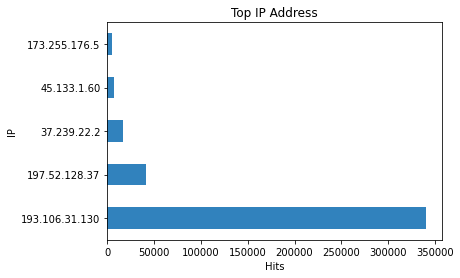

In [19]:
top_ip_count = df.ip.value_counts().head(5)
top_ip_count.plot(kind="barh", colormap="tab20c")
plt.title("Top IP Address")
plt.xlabel("Hits")
plt.ylabel("IP")
plt.show()

### Graph Top Status

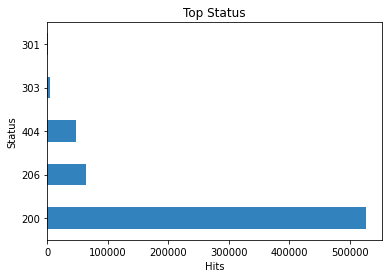

In [20]:
top_status_count = df.status.value_counts().head(5)
top_status_count.plot(kind="barh", colormap="tab20c")
plt.title("Top Status")
plt.xlabel("Hits")
plt.ylabel("Status")
plt.show()